# Random Forest (Vanilla and Balanced)

## Results

In [42]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from core.plots import plot_confusion_matrix
from core.data import load_data
from train import evaluate

In [14]:
class Args:
    data_path = './data/records/all_contrib'
    reduced_classes = True
    create_embedding = False
    model = 'balanced-rf' #'rf' if vanilla RF.
    split = 0

args = Args()

_, x_test, _, y_test = load_data(args)

exp_path = './experiments/{}'.format(args.model)
model = pickle.load(open('{}/trained_model.sav'.format(exp_path), 'rb'))
print(model)

BalancedRandomForestClassifier(criterion='entropy', max_depth=100,
                               max_features='sqrt', n_estimators=500)


Model Performance: balanced-rf
Accuracy = 43.03%.
F1-Score = 30.26%.


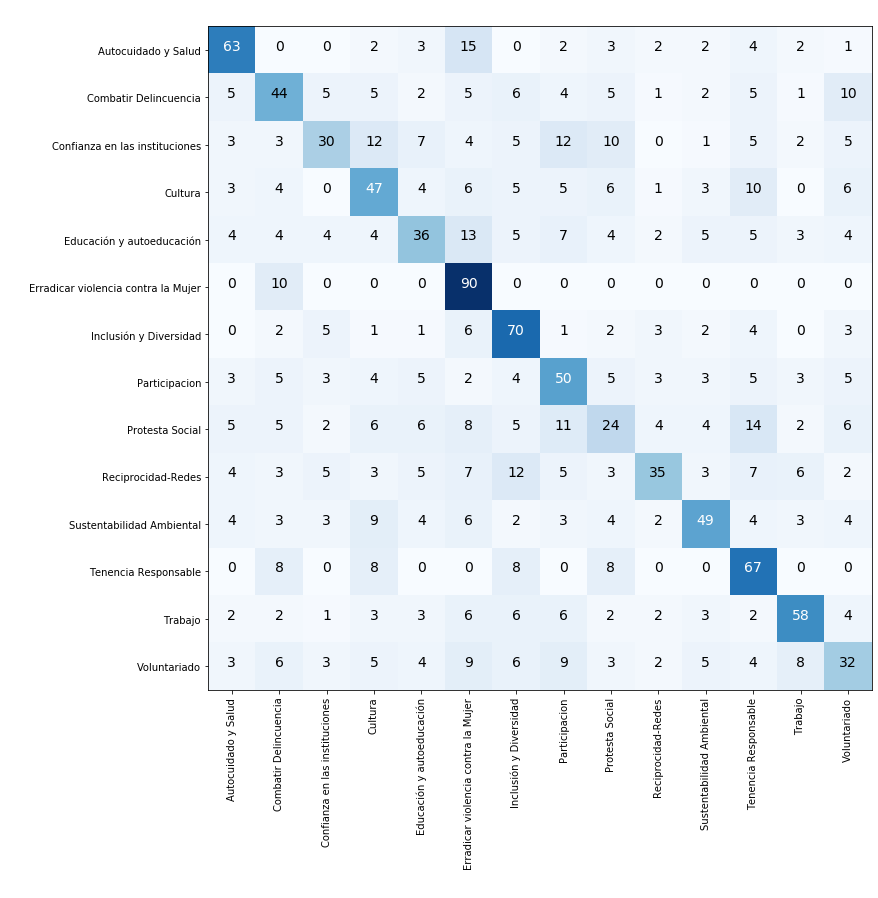

In [15]:
evaluate(args, model, x_test, y_test)

## Predicting on unlabeled data.

In [47]:
embedding_filename = 'unlabeled_contributions_fasttext-sbwc_reduced.npy'
data = np.load('{}/{}'.format(args.data_path, embedding_filename), allow_pickle=True)
tokens = pd.read_excel('{}/contributions.xlsx'.format(args.data_path))
x_unlabeled = data[:,2:]

In [48]:
probs = model.predict_proba(x_unlabeled)

## Analizing high entropy datapoints.

In [56]:
entropy = -np.sum(probs * np.log2(probs+1e-10), axis=1)
n = 5 #Top 5 most entropyc datapoints.
ixs = (-entropy).argsort()[:n]

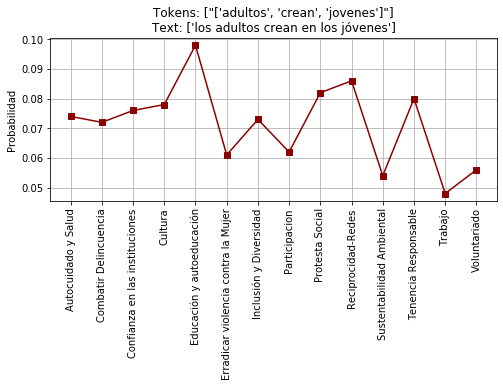

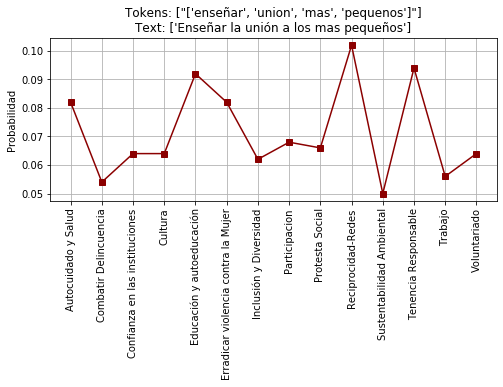

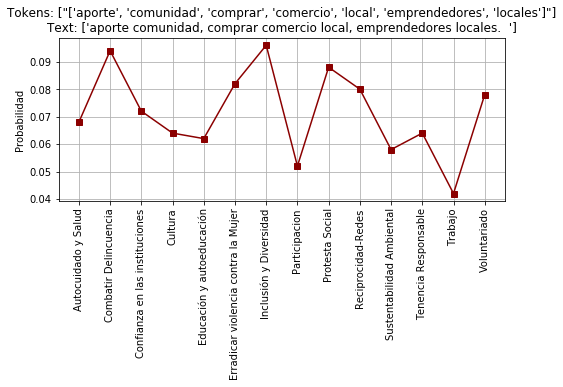

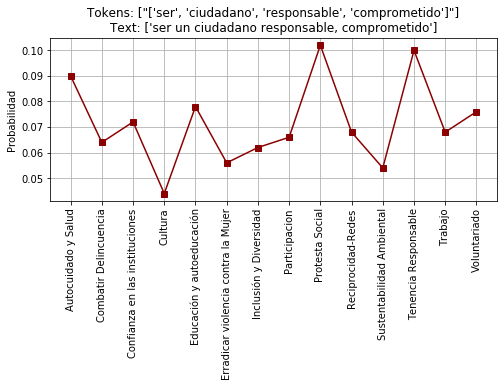

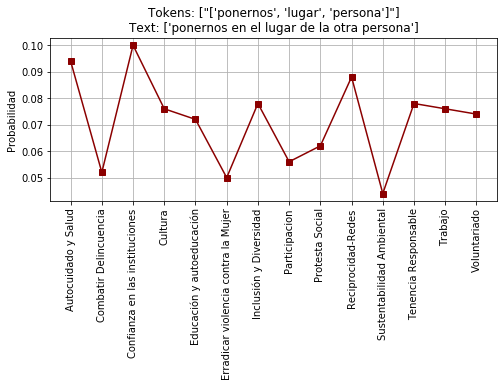

In [57]:
for ix in ixs:
    fig, axes = plt.subplots(1,1, figsize=(8, 3))

    axes.plot(probs[ix], color='darkred', marker='s')
    axes.set_xticks(range(len(model.classes_)))
    axes.set_xticklabels(model.classes_, rotation=90)

    axes.set_ylabel('Probabilidad')
    axes.grid(True)
    tkn = tokens[tokens.con_id == data[ix][0]].tokens.values
    txt = tokens[tokens.con_id == data[ix][0]].text.values
    axes.set_title('Tokens: {}\nText: {}'.format(tkn, txt))

## Analizing low entropy datapoints.

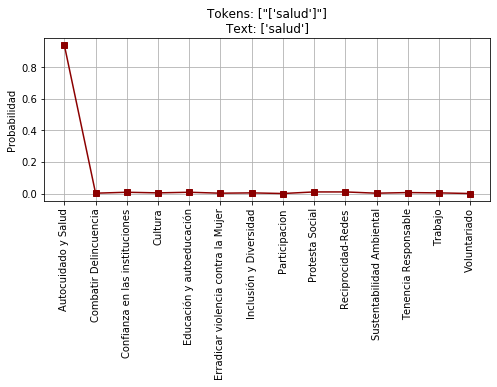

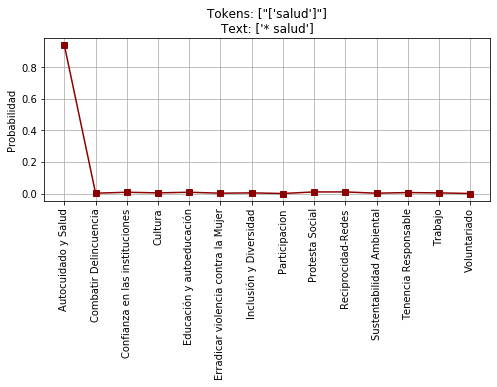

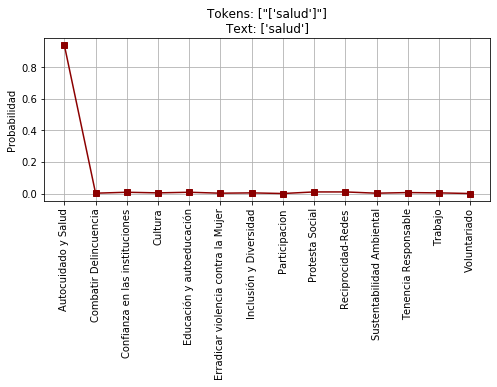

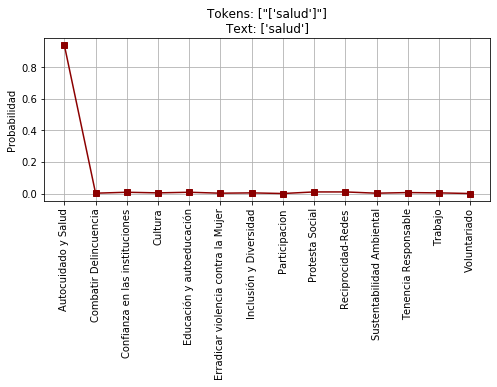

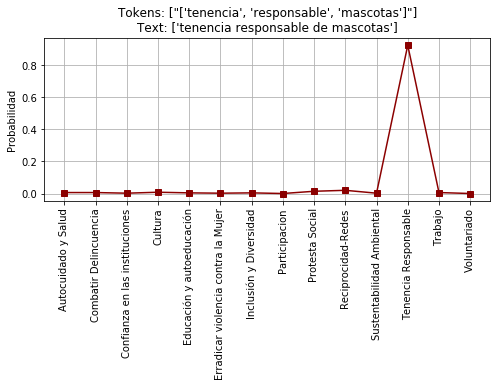

In [63]:
ixs = (entropy).argsort()[:n]

for ix in ixs:
    fig, axes = plt.subplots(1,1, figsize=(8, 3))

    axes.plot(probs[ix], color='darkred', marker='s')
    axes.set_xticks(range(len(model.classes_)))
    axes.set_xticklabels(model.classes_, rotation=90)

    axes.set_ylabel('Probabilidad')
    axes.grid(True)
    tkn = tokens[tokens.con_id == data[ix][0]].tokens.values
    txt = tokens[tokens.con_id == data[ix][0]].text.values
    axes.set_title('Tokens: {}\nText: {}'.format(tkn, txt))

## Analizing random datapoints.

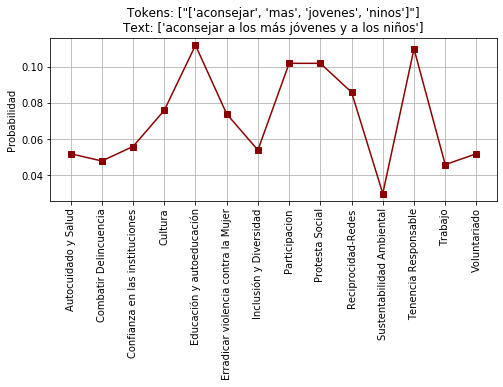

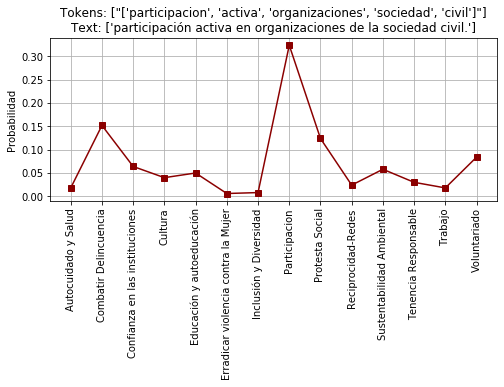

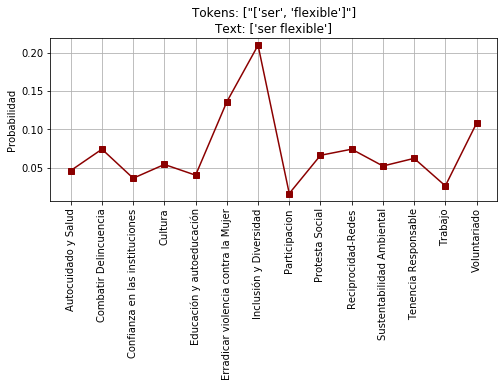

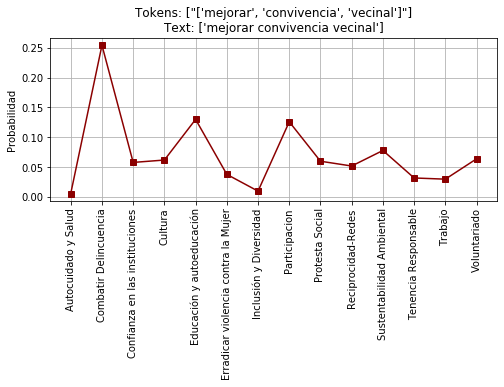

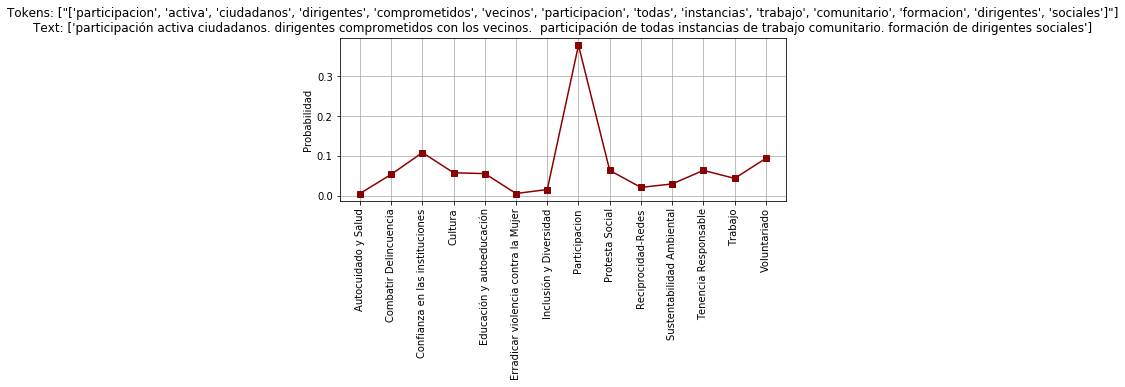

In [64]:
ixs = np.random.randint(0, len(probs), 5)

for ix in ixs:
    fig, axes = plt.subplots(1,1, figsize=(8, 3))

    axes.plot(probs[ix], color='darkred', marker='s')
    axes.set_xticks(range(len(model.classes_)))
    axes.set_xticklabels(model.classes_, rotation=90)

    axes.set_ylabel('Probabilidad')
    axes.grid(True)
    tkn = tokens[tokens.con_id == data[ix][0]].tokens.values
    txt = tokens[tokens.con_id == data[ix][0]].text.values
    axes.set_title('Tokens: {}\nText: {}'.format(tkn, txt))